In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from nets import scSEunet

Using TensorFlow backend.


In [2]:
def get_random_patches(X, Y, p_size=(64, 64, 16), n_samples=40):
    patches = []
    patch_labels = []

    for i in range(X.shape[0]):
        for j in range(n_samples):
            y = np.random.randint(X.shape[1] - p_size[0])
            x = np.random.randint(X.shape[2] - p_size[1])
            z = np.random.randint(X.shape[3] - p_size[2])
            y_end = y + p_size[0]
            x_end = x + p_size[1]
            z_end = z + p_size[2]
        
            patch = X[i, y:y_end, x:x_end, z:z_end,:]
            patch_label = Y[i, y:y_end, x:x_end, z:z_end,:]

            patches.append(patch)
            patch_labels.append(patch_label)

    patches = np.stack(patches, axis=0)
    patch_labels = np.stack(patch_labels, axis=0)

    return patches, patch_labels

In [3]:
model = scSEunet(256, 256, 64, 1)
model.load_weights('ckpt/256_model_scseunet2_fl.p5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
for split in ['test', 'train_train', 'train_val']:
    X, Y = load_dataset(f'data_256_200_64/{split}/', pad=28, addcoords=True)
    x = np.expand_dims(X[:,:,:,:,0], 4)
    outs = model.predict(x, batch_size=1)
    X = np.concatenate((X, outs), axis=4)
    size = (64, 64, 16)
    n_samples = 40

    patches, patch_labels = get_random_patches(X, Y)
    np.save(f'patches/{split}/x_patches.npy', patches)
    np.save(f'patches/{split}/y_patches.npy', patch_labels.astype('uint8'))

100%|██████████| 10/10 [00:02<00:00,  4.67it/s]


In [5]:
outs.shape, X.shape

((10, 256, 256, 64, 6), (10, 256, 256, 64, 10))

In [61]:
np.stack([X[:,:,:,:,i] for i in range(X.shape[-1])] + [outs[:,:,:,:,i] for i in range(outs.shape[-1])], axis=4)

(10, 256, 256, 64, 10)

In [46]:
patches.shape

(400, 64, 64, 16, 4)

In [30]:
patch_labels.shape

(400, 64, 64, 16, 6)

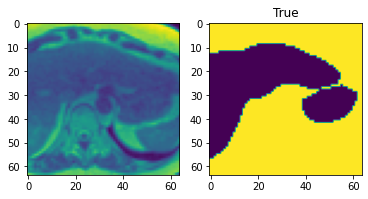

In [215]:
plt.subplot(121)
plt.imshow(patches[i,:,:,8,0])
plt.subplot(122)
plt.imshow(patch_labels[i,:,:,8,0])
i += 1